# BRAIN Project - Data Analysis Notebook (IEEE Publication Quality)

Ce notebook montre comment utiliser le module `data_analysis` pour analyser les résultats des batchs et générer des **figures vectorielles PDF** compatibles avec **LaTeX/Overleaf** et les standards **IEEE**.

## Caractéristiques
- **Sortie PDF vectorielle** pour qualité publication
- **Tailles IEEE standardisées** (single column: 3.5in, double column: 7.16in)
- **Palette colorblind-friendly** (Wong palette)
- **Fonts Computer Modern** (compatibles LaTeX)

## Table des matières
1. [Setup IEEE](#1-setup-ieee)
2. [Chargement des données](#2-chargement-des-données)
3. [Exploration des données](#3-exploration-des-données)
4. [Métriques statistiques](#4-métriques-statistiques)
5. [Visualisations IEEE](#5-visualisations-ieee)
6. [Export pour publication IEEE](#6-export-pour-publication-ieee)
7. [Analyses avancées](#7-analyses-avancées-bonus)

## 1. Setup IEEE

In [36]:
# Imports
import sys
import shutil
from pathlib import Path

# Ajouter le répertoire parent au path
sys.path.insert(0, str(Path.cwd().parent))

# Imports du module data_analysis
from data_analysis import DataLoader, MetricsCalculator, AnalysisVisualizer, ReportGenerator

# Autres imports utiles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =============================================================================
# CONFIGURATION IEEE PUBLICATION QUALITY
# =============================================================================

# Vérifier si LaTeX est disponible
LATEX_AVAILABLE = shutil.which('latex') is not None
print(f"LaTeX disponible: {'Oui' if LATEX_AVAILABLE else 'Non (fallback fonts)'}")

# Configuration matplotlib pour qualité publication IEEE
plt.rcParams.update({
    # LaTeX rendering (uniquement si disponible)
    "text.usetex": LATEX_AVAILABLE,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"] if LATEX_AVAILABLE else ["DejaVu Serif"],
    
    # Tailles de police IEEE
    "font.size": 10,
    "axes.labelsize": 10,
    "axes.titlesize": 11,
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    
    # Figure settings
    "figure.figsize": (7.16, 3.5),  # IEEE double column
    "figure.dpi": 150,
    "savefig.dpi": 300,
    "savefig.bbox": "tight",
    "savefig.format": "pdf",  # VECTORIEL par défaut
    
    # Style
    "axes.grid": False,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "lines.linewidth": 1.5,
})

# Tailles IEEE pour référence
IEEE_SINGLE_COLUMN = (3.5, 2.5)   # 3.5 inches width
IEEE_DOUBLE_COLUMN = (7.16, 3.5)  # 7.16 inches width

# Dossier de sortie pour les figures
OUTPUT_DIR = Path("../analysis/figures_ieee/")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

%matplotlib inline

print(f"\n✓ Setup IEEE complete!")
print(f"📁 Figures will be saved to: {OUTPUT_DIR.absolute()}")

LaTeX disponible: Non (fallback fonts)

✓ Setup IEEE complete!
📁 Figures will be saved to: /Users/patriciadauphole/Desktop/2A - SUPAERO/UE7 - Projets/Projet BRAIN/Projet-BRAIN/Arthur_2/BRAIN_PROJECT/notebooks/../analysis/figures_ieee


## 2. Chargement des données

In [37]:
# Créer un DataLoader
loader = DataLoader()

# Charger tous les batchs depuis le répertoire results/
# Modifier le chemin si nécessaire
results_dir = "../results/"

df = loader.load_all_batches(results_dir)

print(f"\n📊 Loaded {len(df)} task results")

Found 4 batch folders
  ✓ Loaded batch_20260129_105921: 16 tasks
  ✓ Loaded batch_20260129_111236: 52 tasks
  ✓ Loaded batch_20260130_133343: 52 tasks
  ✓ Loaded batch_20260130_134322: 52 tasks

Total: 172 task results loaded

📊 Loaded 172 task results


In [38]:
# Alternative: charger un seul batch
# df = loader.load_batch("../results/batch_20260129_XXXXXX/")

# Ou charger depuis un CSV
# df = loader.load_csv("../analysis/full_data.csv")

## 3. Exploration des données

In [39]:
# Aperçu du DataFrame
print("Colonnes disponibles:")
print(df.columns.tolist())

Colonnes disponibles:
['task_id', 'task_file', 'success', 'is_correct', 'accuracy', 'execution_time', 'detected_transformations', 'action_used', 'error_message', 'num_train_examples', 'num_test_examples', 'grid_size', 'primary_transformation', 'transformation_confidence', 'transformation_params', 'was_fallback_used', 'llm_proposed_action', 'fallback_reason', 'batch_id', 'model', 'batch_timestamp', 'program_version', 'timing_total', 'timing_llm_response', 'timing_detection', 'timing_action_execution', 'complexity_mode', 'complexity_num_colors', 'complexity_num_objects']


In [40]:
# Premières lignes
df.head()

,task_id,task_file,success,is_correct,accuracy,execution_time,detected_transformations,action_used,error_message,num_train_examples,...,model,batch_timestamp,program_version,timing_total,timing_llm_response,timing_detection,timing_action_execution,complexity_mode,complexity_num_colors,complexity_num_objects
0,task_add_border,data/task_add_border.json,True,True,1.0,6.636166,"[add_border, add_border, add_border]",color_change,None,3,...,llama3,2026-01-29T10:59:21.463232,1.10.0,6.636,6.397,0.000,0.001,single,1,0
1,task_blob_color_change,data/task_blob_color_change.json,True,True,1.0,4.978905,"[color_change, color_change]",color_change,None,2,...,llama3,2026-01-29T10:59:21.463232,1.10.0,4.979,4.970,0.001,0.000,single,1,0
2,task_blob_reflection,data/task_blob_reflection.json,True,True,1.0,4.933386,"[reflection, rotation, reflection, rotation]",reflect,None,2,...,llama3,2026-01-29T10:59:21.463232,1.10.0,4.933,4.925,0.000,0.003,single,1,0
3,task_blob_rotation,data/task_blob_rotation.json,True,True,1.0,4.936360,"[rotation, rotation]",rotate,None,2,...,llama3,2026-01-29T10:59:21.463232,1.10.0,4.936,4.927,0.001,0.001,single,1,0
4,task_blob_translation,data/task_blob_translation.json,True,True,1.0,6.420048,"[translation, translation]",translate,None,2,...,llama3,2026-01-29T10:59:21.463232,1.10.0,6.420,6.408,0.001,0.003,single,1,0


In [41]:
# Statistiques de base
df.describe()

,accuracy,execution_time,num_train_examples,num_test_examples,transformation_confidence,timing_total,timing_llm_response,timing_detection,timing_action_execution,complexity_num_colors,complexity_num_objects
count,172.000000,172.000000,172.000000,172.0,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.0
mean,0.977081,6.194301,2.046512,1.0,0.930233,6.194267,5.398000,0.000541,0.000308,1.133721,0.0
std,0.056395,2.901741,0.211205,0.0,0.255498,2.901779,2.794328,0.000819,0.000615,0.404105,0.0
min,0.666667,2.827112,2.000000,1.0,0.000000,2.827000,0.000000,0.000000,0.000000,1.000000,0.0
25%,1.000000,4.707353,2.000000,1.0,1.000000,4.707000,3.926000,0.000000,0.000000,1.000000,0.0
50%,1.000000,5.663675,2.000000,1.0,1.000000,5.664000,5.096000,0.000000,0.000000,1.000000,0.0
75%,1.000000,6.769638,2.000000,1.0,1.000000,6.770000,6.399250,0.001000,0.000000,1.000000,0.0
max,1.000000,23.504513,3.000000,1.0,1.000000,23.505000,23.500000,0.004000,0.003000,3.000000,0.0


In [42]:
# Distribution des transformations
if 'primary_transformation' in df.columns:
    print("Distribution des transformations:")
    print(df['primary_transformation'].value_counts())

Distribution des transformations:
primary_transformation
translation     35
composite       27
reflection      26
rotation        19
tiling          17
draw_line       16
add_border      13
color_change     7
Name: count, dtype: int64


In [43]:
# Distribution des modèles (si plusieurs)
if 'model' in df.columns:
    print("Modèles utilisés:")
    print(df['model'].value_counts())

Modèles utilisés:
model
llama3     68
mistral    52
phi3       52
Name: count, dtype: int64


In [44]:
# Taux de succès global
print(f"Accuracy moyenne: {df['accuracy'].mean():.1%}")
print(f"Taux de succès (100%): {df['is_correct'].mean():.1%}")
print(f"Taux d'échec: {(~df['success']).mean():.1%}")

Accuracy moyenne: 97.7%
Taux de succès (100%): 82.0%
Taux d'échec: 0.0%


## 4. Métriques statistiques

In [45]:
# Créer un calculateur de métriques
calc = MetricsCalculator(df)

In [46]:
# Accuracy globale
overall = calc.overall_accuracy()
print("📊 Accuracy globale:")
for key, value in overall.items():
    if isinstance(value, float):
        print(f"  {key}: {value:.4f}")
    else:
        print(f"  {key}: {value}")

📊 Accuracy globale:
  mean: 0.9771
  std: 0.0564
  min: 0.6667
  max: 1.0000
  median: 1.0000
  count: 172


In [47]:
# Accuracy par type de transformation
acc_by_trans = calc.accuracy_by_transformation()
print("📊 Accuracy par transformation:")
acc_by_trans

📊 Accuracy par transformation:


,mean,std,count,min,max,success_rate
primary_transformation,,,,,,
add_border,1.0000,0.0000,13,1.0000,1.0,1.0000
color_change,1.0000,0.0000,7,1.0000,1.0,1.0000
draw_line,1.0000,0.0000,16,1.0000,1.0,1.0000
tiling,1.0000,0.0000,17,1.0000,1.0,1.0000
translation,1.0000,0.0000,35,1.0000,1.0,1.0000
reflection,0.9728,0.0745,26,0.6667,1.0,0.8462
rotation,0.9679,0.0487,19,0.8906,1.0,0.6842
composite,0.9358,0.0688,27,0.8125,1.0,0.4074


In [48]:
# Accuracy par modèle (si plusieurs modèles)
acc_by_model = calc.accuracy_by_model()
if not acc_by_model.empty:
    print("📊 Accuracy par modèle:")
    display(acc_by_model)

📊 Accuracy par modèle:


,mean,std,count,min,max,success_rate
model,,,,,,
mistral,0.9799,0.0481,52,0.8125,1.0,0.8269
llama3,0.9763,0.0622,68,0.6667,1.0,0.8235
phi3,0.9753,0.0571,52,0.7500,1.0,0.8077


In [49]:
# Comparaison LLM vs Fallback
llm_fb = calc.llm_vs_fallback_comparison()
print("🤖 LLM vs Fallback:")
for key, value in llm_fb.items():
    if isinstance(value, dict):
        print(f"  {key}:")
        for k, v in value.items():
            print(f"    {k}: {v:.4f}" if isinstance(v, float) else f"    {k}: {v}")
    else:
        print(f"  {key}: {value:.4f}" if isinstance(value, float) else f"  {key}: {value}")

🤖 LLM vs Fallback:
  llm_only:
    count: 130
    accuracy_mean: 0.9830
    accuracy_std: 0.0530
    success_rate: 0.8846
  with_fallback:
    count: 42
    accuracy_mean: 0.9587
    accuracy_std: 0.0630
    success_rate: 0.6190
  fallback_usage_rate: 0.2442


In [50]:
# Statistiques de timing
timing = calc.timing_statistics()
print("⏱️ Timing (secondes):")
for component, stats in timing.items():
    print(f"  {component}: mean={stats['mean']:.3f}s, std={stats['std']:.3f}s")

⏱️ Timing (secondes):
  total: mean=6.194s, std=2.902s
  llm: mean=5.398s, std=2.794s
  detection: mean=0.001s, std=0.001s
  execution: mean=0.000s, std=0.001s
  total_legacy: mean=6.194s, std=2.902s


In [51]:
# T-test entre deux groupes (exemple: deux transformations)
# Décommenter et modifier selon vos données

# transformations = df['primary_transformation'].unique()
# if len(transformations) >= 2:
#     t1, t2 = transformations[0], transformations[1]
#     ttest = calc.compare_models_ttest(t1, t2, metric='accuracy')
#     print(f"T-test {t1} vs {t2}:")
#     print(f"  p-value: {ttest['p_value']:.4f}")
#     print(f"  Significatif (α=0.05): {ttest['significant_005']}")

## 5. Visualisations IEEE

Les visualisations suivantes utilisent:
- **Tailles IEEE standardisées** (single: 3.5in, double: 7.16in)
- **PDF vectoriel** pour qualité publication
- **Palette colorblind-friendly** (Wong palette)

In [52]:
# Créer le visualiseur en mode publication IEEE
viz = AnalysisVisualizer(df, style="publication")

# Info sur la configuration
print(f"LaTeX disponible: {viz.latex_available}")
print(f"Style: {viz.style}")
print(f"\nTailles IEEE disponibles:")
print(f"  Single column: {viz.IEEE_SINGLE_COLUMN}")
print(f"  Double column: {viz.IEEE_DOUBLE_COLUMN}")

LaTeX disponible: False
Style: publication

Tailles IEEE disponibles:
  Single column: (3.5, 2.5)
  Double column: (7.16, 3.5)


### 5.1 Accuracy par transformation (IEEE double column)

In [53]:
# Barplot avec taille IEEE double column et export PDF
fig = viz.plot_accuracy_by_transformation(
    ieee_size="double",  # 7.16 inches width
    show_std=True,
    show_n=True,
    save_path=str(OUTPUT_DIR / "accuracy_by_transformation"),
    save_formats=["pdf", "png"]  # PDF vectoriel + PNG preview
)

Saved: ../analysis/figures_ieee/accuracy_by_transformation.pdf
Saved: ../analysis/figures_ieee/accuracy_by_transformation.png


### 5.2 Boxplot de la distribution (IEEE double column)

In [54]:
# Boxplot avec taille IEEE
fig = viz.plot_accuracy_boxplot(
    ieee_size="double",
    save_path=str(OUTPUT_DIR / "accuracy_boxplot"),
    save_formats=["pdf", "png"]
)

Saved: ../analysis/figures_ieee/accuracy_boxplot.pdf
Saved: ../analysis/figures_ieee/accuracy_boxplot.png


### 5.3 Comparaison des modèles

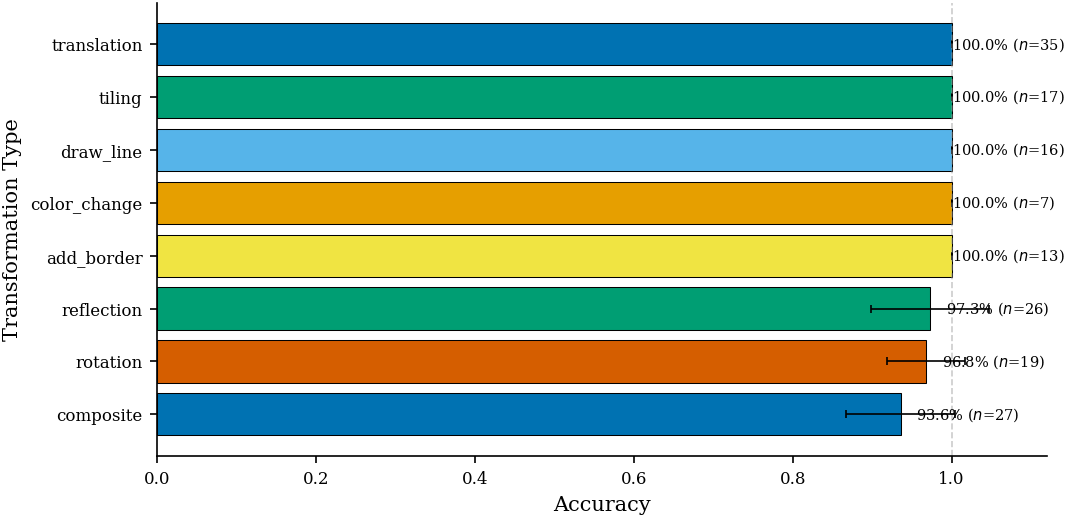

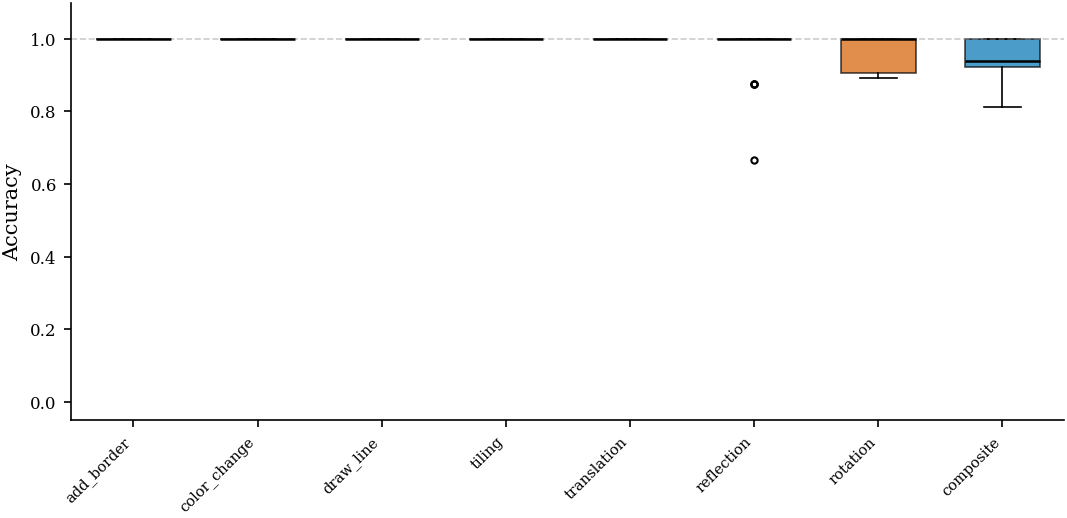

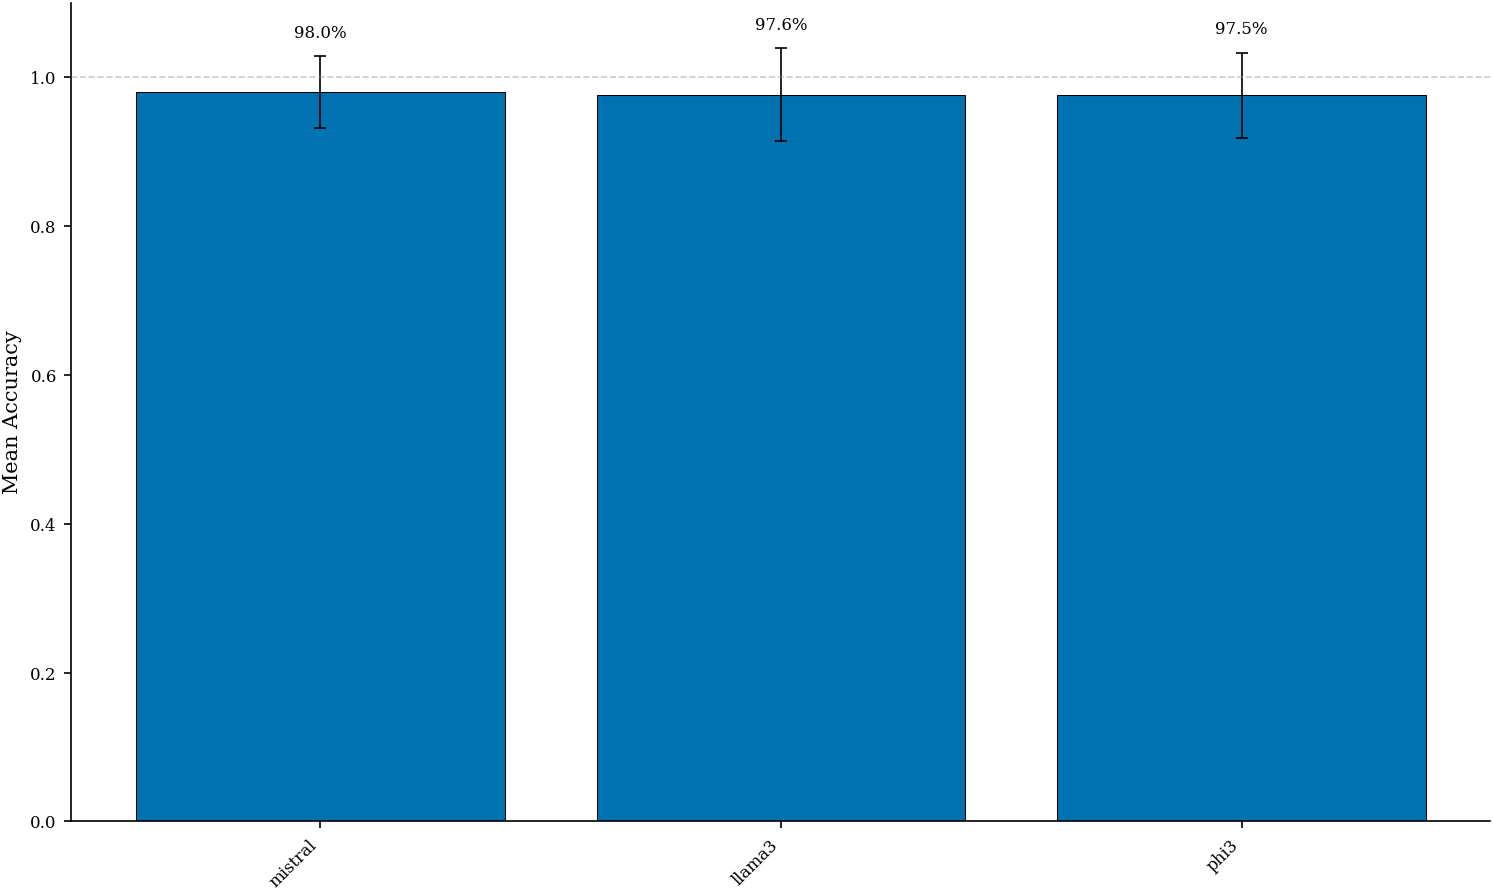

In [55]:
# Comparaison des modèles (si plusieurs modèles)
if df['model'].nunique() > 1:
    fig = viz.plot_model_comparison(figsize=(10, 6))
    plt.show()
else:
    print("Un seul modèle dans les données - comparaison non disponible")

### 5.4 LLM vs Fallback (IEEE double column)

In [56]:
# Comparaison LLM vs Fallback
fig = viz.plot_llm_vs_fallback(
    ieee_size="double",
    save_path=str(OUTPUT_DIR / "llm_vs_fallback"),
    save_formats=["pdf", "png"]
)

Saved: ../analysis/figures_ieee/llm_vs_fallback.pdf
Saved: ../analysis/figures_ieee/llm_vs_fallback.png


### 5.5 Décomposition du timing (IEEE double column)

In [57]:
# Breakdown du temps par composante
fig = viz.plot_timing_breakdown(
    ieee_size="double",
    save_path=str(OUTPUT_DIR / "timing_breakdown"),
    save_formats=["pdf", "png"]
)

Saved: ../analysis/figures_ieee/timing_breakdown.pdf
Saved: ../analysis/figures_ieee/timing_breakdown.png


### 5.6 Matrice de confusion (IEEE single column)

In [58]:
# Matrice de confusion (format carré, single column)
fig = viz.plot_confusion_matrix(
    ieee_size="single",
    save_path=str(OUTPUT_DIR / "confusion_matrix"),
    save_formats=["pdf", "png"]
)

Saved: ../analysis/figures_ieee/confusion_matrix.pdf
Saved: ../analysis/figures_ieee/confusion_matrix.png


### 5.7 Visualisations personnalisées

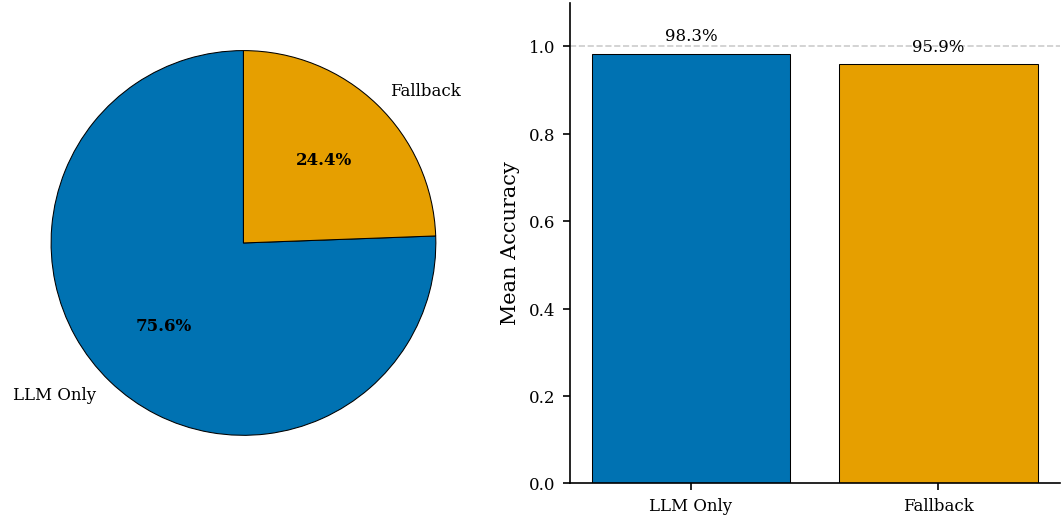

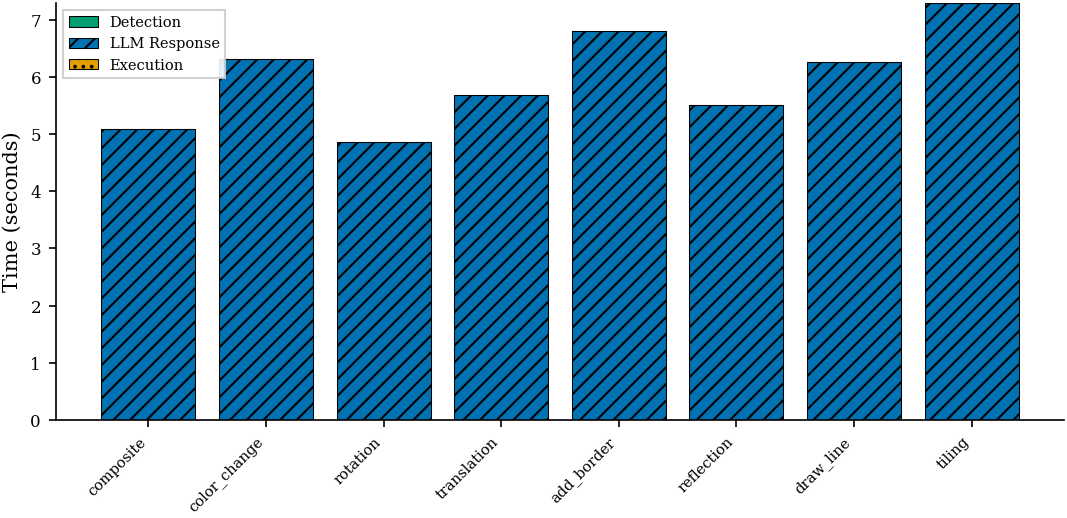

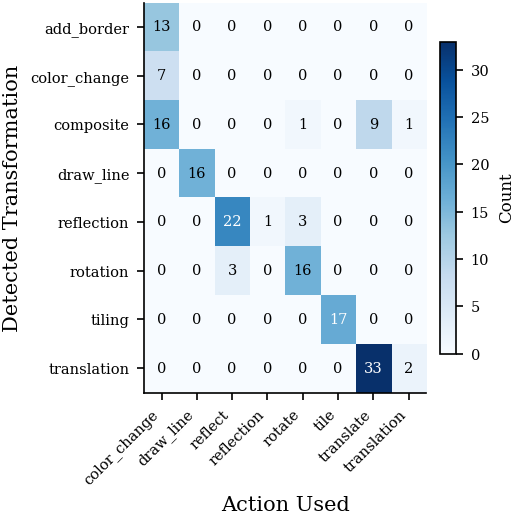

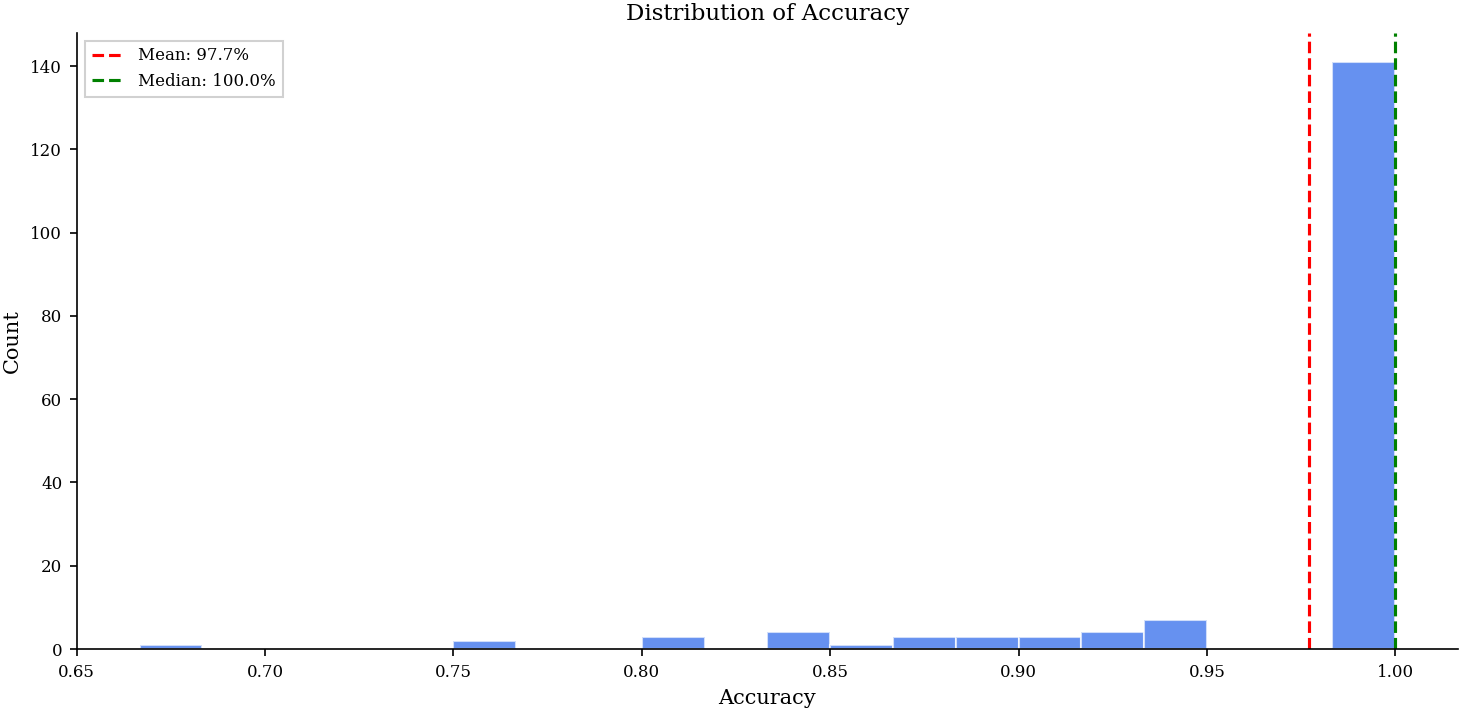

In [59]:
# Exemple: histogramme de l'accuracy
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(df['accuracy'], bins=20, edgecolor='white', alpha=0.7, color='#2563eb')
ax.axvline(df['accuracy'].mean(), color='red', linestyle='--', label=f'Mean: {df["accuracy"].mean():.1%}')
ax.axvline(df['accuracy'].median(), color='green', linestyle='--', label=f'Median: {df["accuracy"].median():.1%}')

ax.set_xlabel('Accuracy')
ax.set_ylabel('Count')
ax.set_title('Distribution of Accuracy')
ax.legend()

plt.tight_layout()
plt.show()

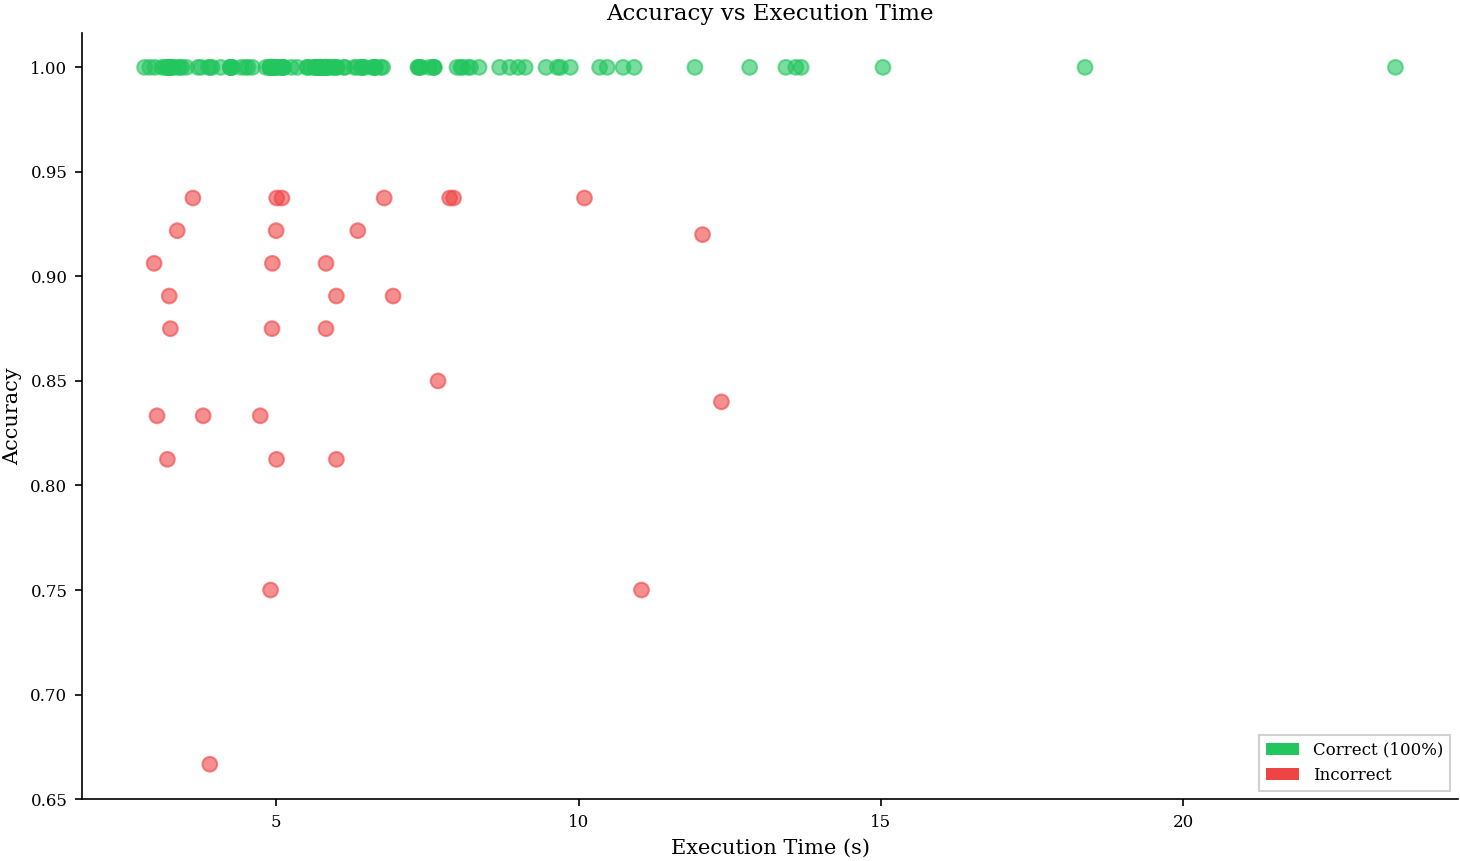

In [60]:
# Exemple: scatter plot accuracy vs temps d'exécution
fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(
    df['execution_time'], 
    df['accuracy'],
    c=df['is_correct'].map({True: '#22c55e', False: '#ef4444'}),
    alpha=0.6,
    s=50
)

ax.set_xlabel('Execution Time (s)')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy vs Execution Time')

# Légende
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#22c55e', label='Correct (100%)'),
    Patch(facecolor='#ef4444', label='Incorrect')
]
ax.legend(handles=legend_elements)

plt.tight_layout()
plt.show()

## 6. Export pour publication IEEE

Cette section génère tous les fichiers nécessaires pour une publication IEEE:
- **Figures PDF** vectorielles
- **Tableaux LaTeX** prêts à inclure
- **CSV** pour données supplémentaires

In [61]:
# Créer un générateur de rapports
gen = ReportGenerator(df, calc)

In [62]:
# Générer des tableaux LaTeX
output_dir = "../analysis/"
gen.generate_latex_tables(output_dir + "latex/")

Generated: ../analysis/latex/brain_accuracy_transformation.tex
Generated: ../analysis/latex/brain_model_comparison.tex
Generated: ../analysis/latex/brain_llm_fallback.tex
Generated: ../analysis/latex/brain_timing.tex


In [63]:
# Générer un rapport Markdown
gen.generate_markdown_report(output_dir + "report.md")

Generated: ../analysis/report.md


In [64]:
# Exporter en CSV
gen.generate_csv_summary(output_dir + "summary.csv")
gen.export_full_data(output_dir + "full_data.csv")

Generated: ../analysis/summary.csv
Exported: ../analysis/full_data.csv


In [65]:
# Générer toutes les figures IEEE d'un coup
ieee_figures_dir = str(OUTPUT_DIR)

viz.generate_all_plots(
    output_dir=ieee_figures_dir,
    formats=["pdf"]  # PDF vectoriel pour IEEE
)

print(f"\n✓ All IEEE figures saved to: {ieee_figures_dir}")

Generating publication-quality figures...
Saved: ../analysis/figures_ieee/accuracy_by_transformation.pdf
Saved: ../analysis/figures_ieee/accuracy_boxplot.pdf
Saved: ../analysis/figures_ieee/timing_breakdown.pdf
Saved: ../analysis/figures_ieee/llm_vs_fallback.pdf
Saved: ../analysis/figures_ieee/confusion_matrix.pdf
Saved: ../analysis/figures_ieee/model_comparison.pdf
No variance in complexity_num_objects - cannot plot trend

All figures saved to: ../analysis/figures_ieee

✓ All IEEE figures saved to: ../analysis/figures_ieee


In [66]:
# Liste des fichiers générés
from pathlib import Path

print("Fichiers PDF générés pour IEEE:")
for f in sorted(OUTPUT_DIR.glob("*.pdf")):
    print(f"  - {f.name}")

print(f"\n💡 Ces fichiers PDF peuvent être directement inclus dans LaTeX:")
print(r'   \includegraphics[width=\columnwidth]{figures/accuracy_by_transformation.pdf}')

Fichiers PDF générés pour IEEE:
  - accuracy_boxplot.pdf
  - accuracy_by_transformation.pdf
  - confusion_matrix.pdf
  - llm_vs_fallback.pdf
  - model_comparison.pdf
  - timing_breakdown.pdf

💡 Ces fichiers PDF peuvent être directement inclus dans LaTeX:
   \includegraphics[width=\columnwidth]{figures/accuracy_by_transformation.pdf}


### Inclusion dans LaTeX/Overleaf

Pour inclure les figures dans un document IEEE LaTeX:

```latex
% Single column figure
\begin{figure}[t]
    \centering
    \includegraphics[width=\columnwidth]{figures/confusion_matrix.pdf}
    \caption{Confusion matrix: detected transformation vs executed action.}
    \label{fig:confusion}
\end{figure}

% Double column figure (spanning both columns)
\begin{figure*}[t]
    \centering
    \includegraphics[width=\textwidth]{figures/accuracy_by_transformation.pdf}
    \caption{Accuracy by transformation type across all tasks.}
    \label{fig:accuracy}
\end{figure*}
```

Pour inclure les tableaux LaTeX:

```latex
\input{latex/brain_accuracy_transformation.tex}
\input{latex/brain_llm_fallback.tex}
\input{latex/brain_timing.tex}
```

## 7. Analyses avancées (bonus)

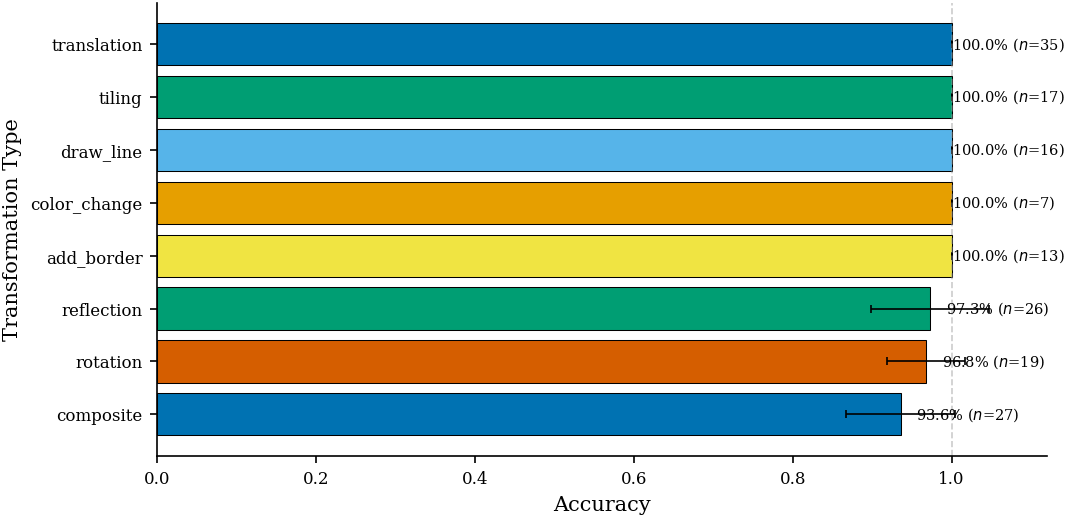

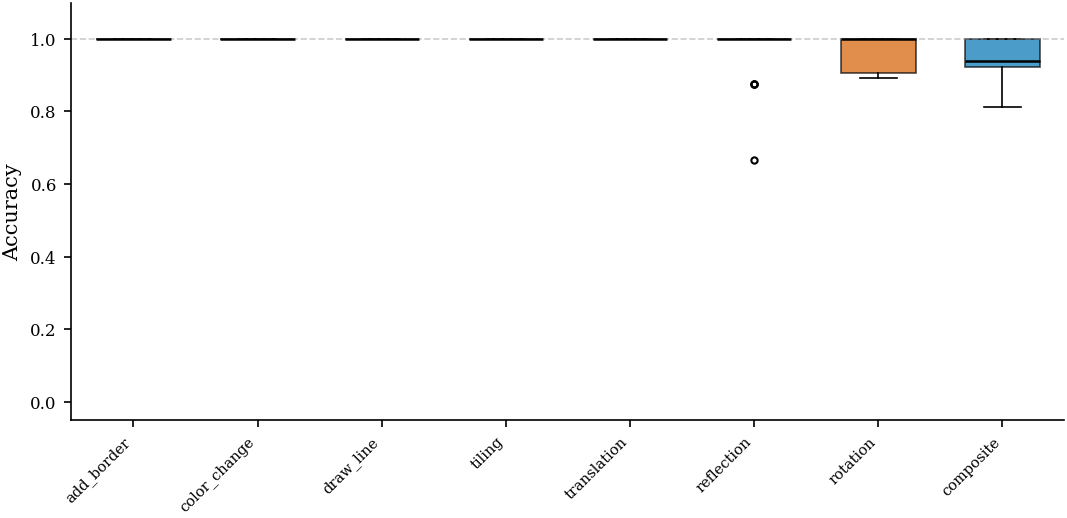

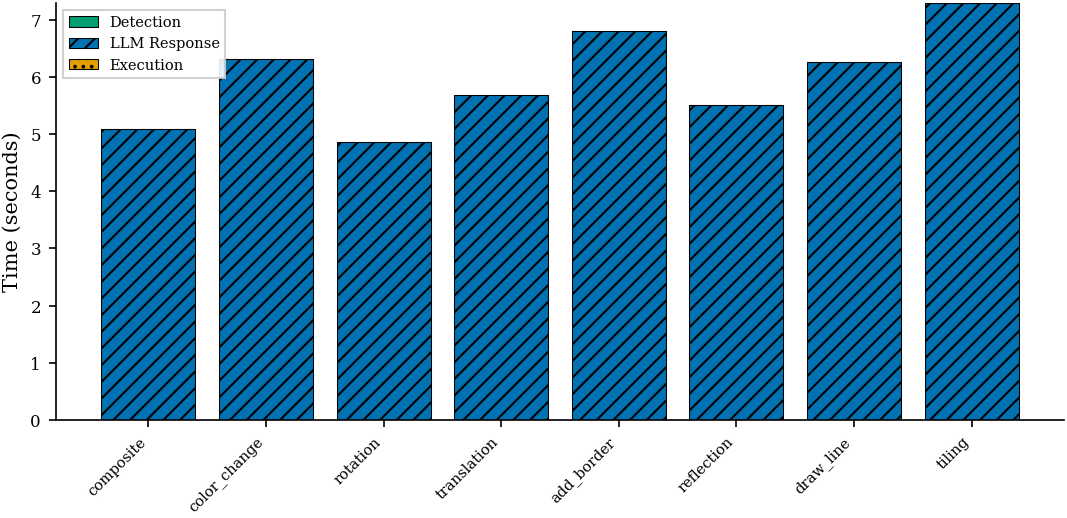

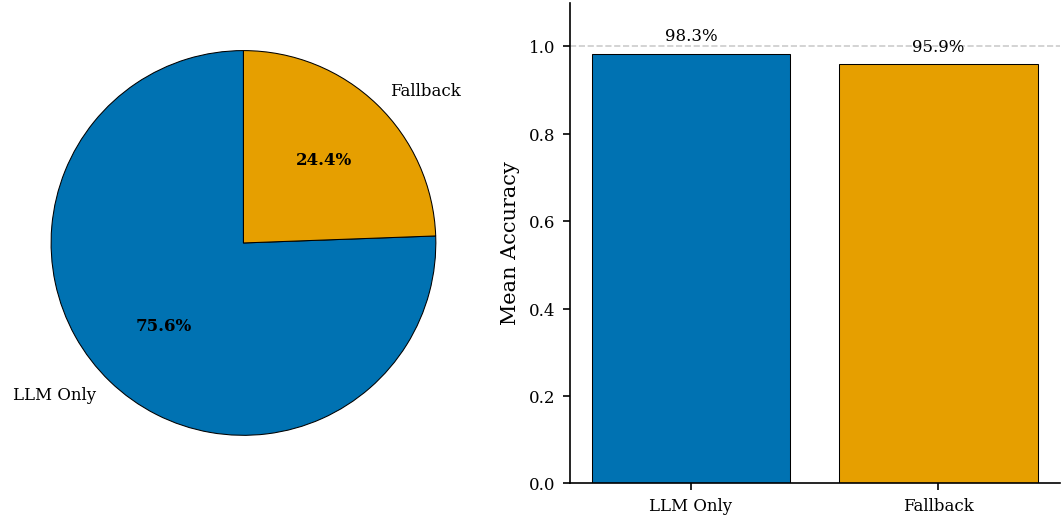

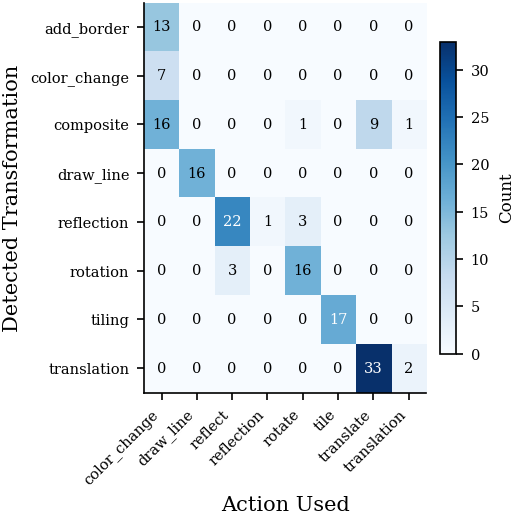

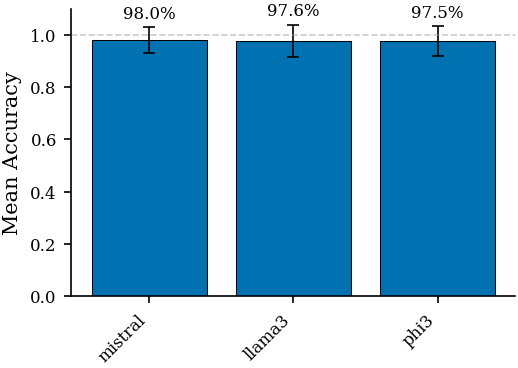

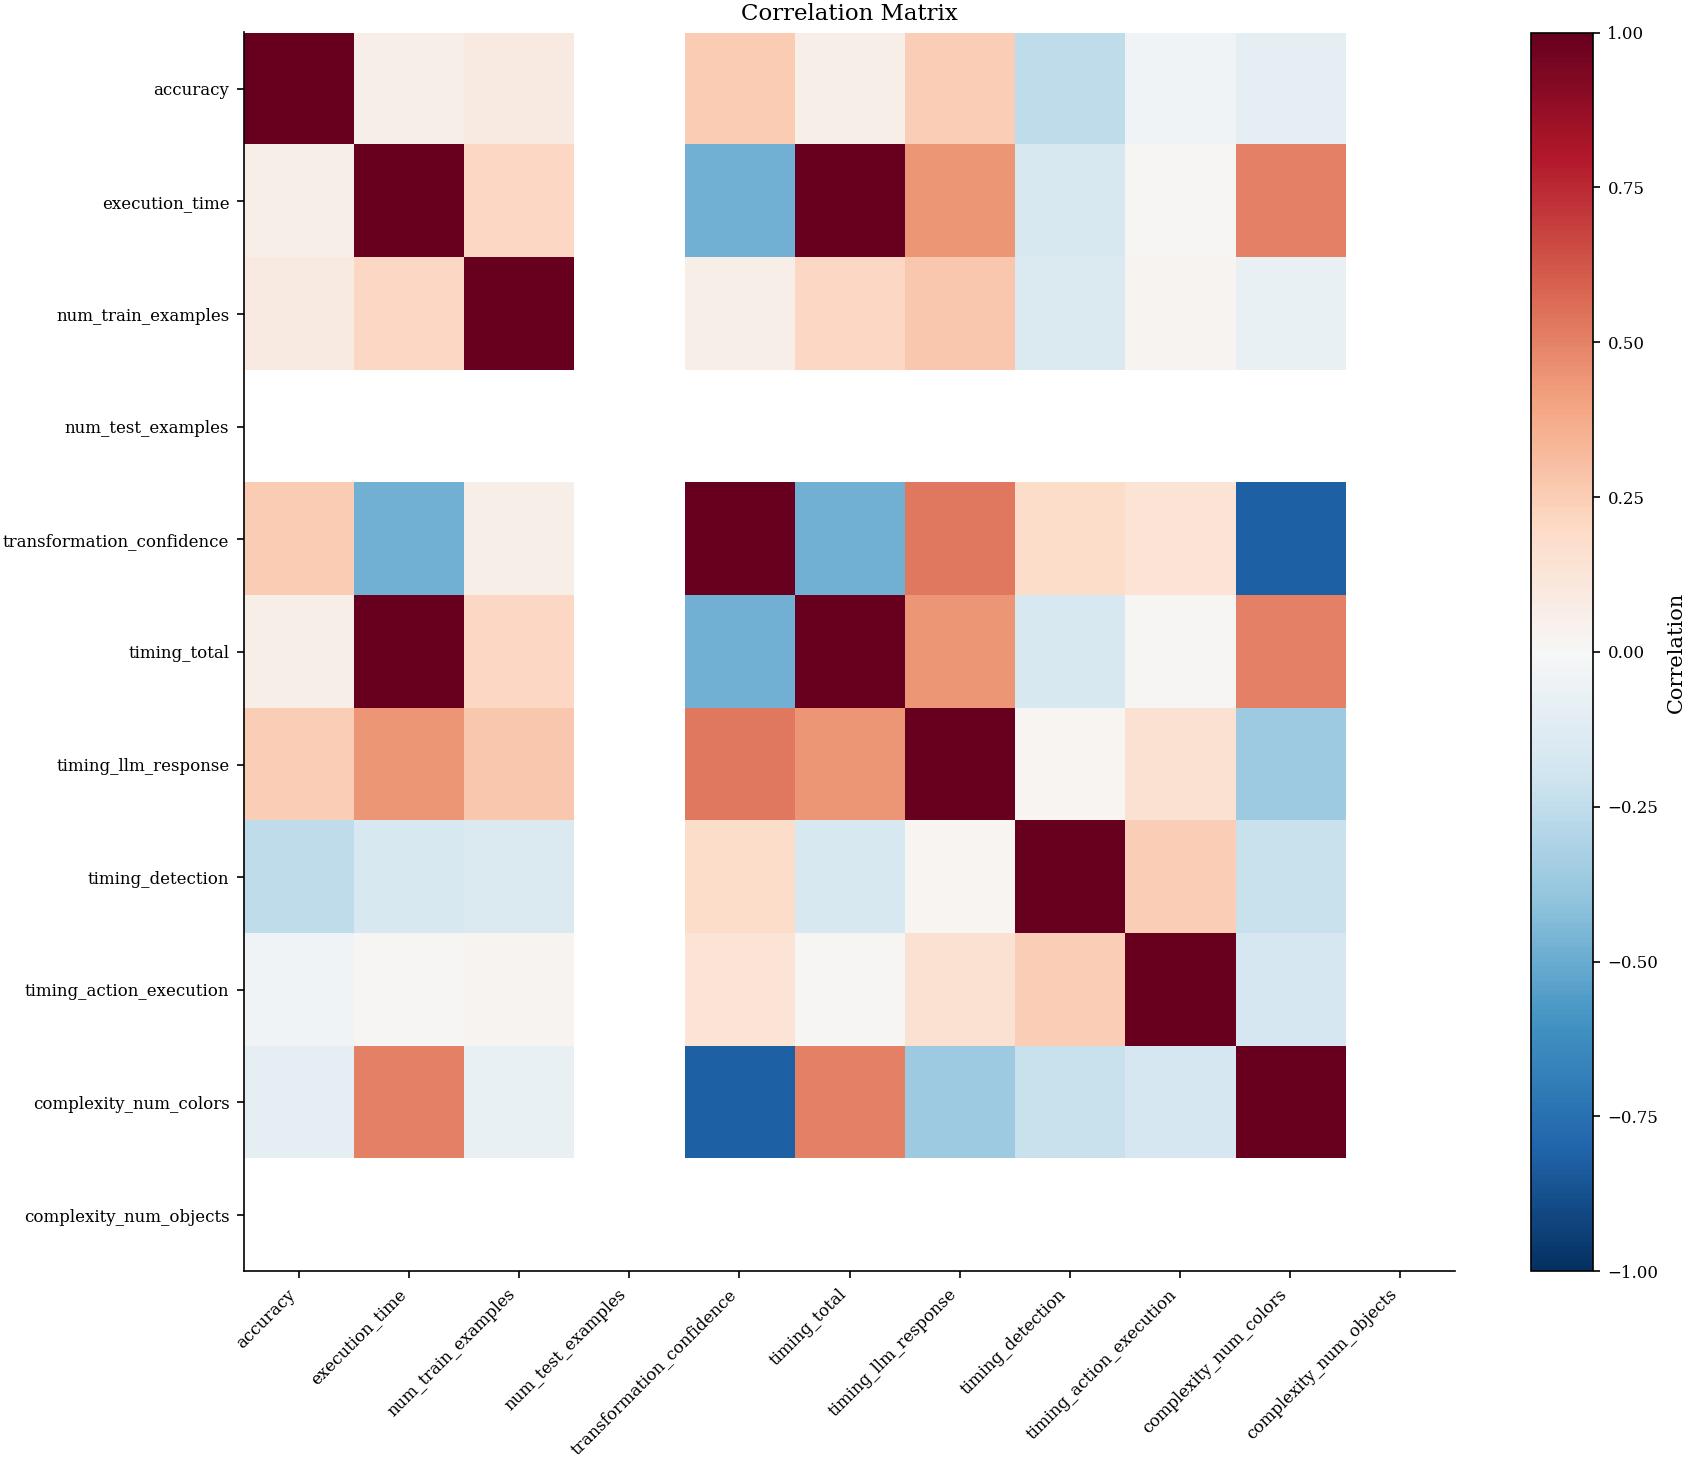

In [67]:
# Corrélations entre variables
corr = calc.correlation_analysis()

# Heatmap des corrélations
fig, ax = plt.subplots(figsize=(12, 10))
im = ax.imshow(corr, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)

ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.index)))
ax.set_xticklabels(corr.columns, rotation=45, ha='right', fontsize=8)
ax.set_yticklabels(corr.index, fontsize=8)

plt.colorbar(im, ax=ax, label='Correlation')
ax.set_title('Correlation Matrix')

plt.tight_layout()
plt.show()

In [68]:
# Analyse par complexité (nombre de couleurs)
if 'complexity_num_colors' in df.columns:
    acc_by_complexity = calc.accuracy_by_complexity('complexity_num_colors')
    print("Accuracy par nombre de couleurs:")
    display(acc_by_complexity)

Accuracy par nombre de couleurs:


,mean,std,count
complexity_num_colors,,,
1,0.9801,0.0509,153
2,0.9407,0.0951,15
3,1.0000,0.0000,4


In [69]:
# Tâches les plus difficiles (accuracy la plus basse)
print("Top 10 tâches les plus difficiles:")
difficult = df.nsmallest(10, 'accuracy')[['task_id', 'accuracy', 'primary_transformation', 'action_used']]
difficult

Top 10 tâches les plus difficiles:


,task_id,accuracy,primary_transformation,action_used
14,task_reflection,0.666667,reflection,reflect
40,task_multi_objects,0.750000,None,None
144,task_multi_objects,0.750000,None,None
30,task_color_change_05,0.812500,composite,color_change
82,task_color_change_05,0.812500,composite,color_change
134,task_color_change_05,0.812500,composite,color_change
28,task_color_change_03,0.833333,composite,color_change
80,task_color_change_03,0.833333,composite,color_change
132,task_color_change_03,0.833333,composite,color_change
93,task_multi_objects_same_transform,0.840000,None,None


In [70]:
# Tâches échouées (erreurs)
failed = df[df['success'] == False]
if len(failed) > 0:
    print(f"Tâches échouées: {len(failed)}")
    display(failed[['task_id', 'error_message']].head(10))
else:
    print("Aucune tâche échouée!")

Aucune tâche échouée!


---

## Résumé

Ce notebook a montré comment:

1. **Charger** les données de batch avec `DataLoader`
2. **Explorer** les données avec pandas
3. **Calculer** des métriques statistiques avec `MetricsCalculator`
4. **Visualiser** les résultats avec `AnalysisVisualizer`
5. **Exporter** pour publication avec `ReportGenerator`

### Fichiers générés

- `analysis/latex/*.tex` - Tableaux LaTeX
- `analysis/figures/*.png` - Figures PNG
- `analysis/figures/*.pdf` - Figures PDF (pour LaTeX)
- `analysis/report.md` - Rapport Markdown
- `analysis/summary.csv` - Résumé CSV
- `analysis/full_data.csv` - Données complètes